#Teste AiOps

Nós somos da equipe de AiOps na Globo e queremos te conhecer um pouco melhor. Responda as perguntas abaixo em um Jupyter Notebook (.ipynb) e nos envie sua resposta através de algum link **privado** ou arquivo, pode ser em um github ou Google Colab, como preferir. 
Boa sorte!

# Nova seção



```
1) “AIOps” é um termo criado em 2016 pelo Gartner para nomear a aplicação de recursos de IA na operação de TI, ou do acrônimo inglês “Artificial Intelligence for IT Operations”. 

AIOps consiste em aplicar, de alguma forma, técnicas de ML para resolver problemas de operações de TI. O conceito combina recursos de Big Data de ML para aperfeiçoar funções tradicionais da TI. 

Em sua opinião, como o uso de IA pode ajudar a reduzir problemas comuns em uma operação de um data center? Disserte sobre o assunto.

```

>A utilização de técnicas que envolvem ML ou Deep Learning, tem como um de seus principais objetivos análises preditivas, baseadas em conceitos abordados nas análises descritivas, logo a utlização de IA para identificação de caracteristicas anomalas em um recurso se torna uma excelente ferramenta para auxiliar a prevenção de possíveis falhas, tudo baseado em dados existentes históricos

```
2) Em que situação você usaria o algoritmo SVM sobre o algoritmo Random Forest (e vice versa)?
``` 

> Via de regra isso depende dos dados que estão dispostos ou mesmo o problema que busca-se solucionar, Random Forest funciona muito bem em problema cuja saída é de várias classes, entretanto SVM é utilizado para problemas de ordem binária, normalmente para calculo de vetores e distancia o SVM se aplica melhor, porém Randam se aplica bem com diferentes escalas de dados e suas diferentes caracteristicas

```
3) Qual a diferença entre aprendizado supervisionado e não supervisionado em ML? Responda usando suas próprias palavras
```

> No aprendizado não supervisionado não há rotulos para os dados, sua saída não é conhecida podendo ser uma clusterização ou sumarização, no supervisionado há um conjunto de classe esperado se treina os dados para identificar as saídas possíveis


```
4) É melhor ter muitos falsos positivos ou muitos falsos negativos? Explique
```



> Isso depende do tipo de problema abordado, entretanto caso necessário um Recall maior para o modelo criado, ter um modelo que acuse uma maior quantidade de registros falsos negativos é adequado, os falsos positivos podem gerar análises ou decorrências que muitas vezes não representavam alguma ação. Porém falsos positivos costumas apontar características próximas dos registos o que em muitos casos é ocasioando por um overfiting no treinamento em problemas de analise de sentimento isso pode ser utilizado



```
5) Qual a principal diferença entre MapReduce e Spark? Você já teve experiência em algum projeto com algum deles?

```



> A principal diferença está na interação dos dados enquanto o Apache MapReduce executa a sincronização diretamente nos dados o Apache Spark os processa em memória o que facilita seu escalonamento, sim utilizo constantemente o Spark para etl de dados


```
6) O que é mais importante para você — a precisão do modelo ou a performance do modelo?
```



> Depende do problema a ser solucionado, em casos de problemas assincronos um modelo pode ser mais lento entretanto suas sáidas podem atender melhor o problema, modelos performátivos são melhores utilizados em recomendações instantaneas a nível de resolução, exemplo uma recomendação de compra

```
7) Como você lida com dados ausentes ou corrompidos no dataset?
```

> Há várias técnicas de abordagem destes cenários, em casos aonde há poucos dados procuro efetuar tratativas que sejam plausíveis para manter o máximo de registros possíveis, utilizando média de valores, mediana etc. Em alguns casos os dados precisam ser removidos para não afetar as precisões do modelo.

# Projeto Globoplay Produtos

A Globo decidiu lançar um sistema de compras dentro de seu aplicativo de streaming Globoplay. Os usuários assinam o Globoplay e podem assistir diversos conteúdos de vídeos: filmes, séries, novelas, jornais, etc. Enquanto o usuário assiste o conteúdo, ele pode acessar um menu no aplicativo ou no website que irá mostrar produtos relacionados ao conteúdo que está sendo assistido, exemplo: O personagem de uma novela usa uma roupa de uma marca determinada, o usuário poderá comprar essa mesma roupa da mesma marca.

Vamos supor que esse sistema já esteja sendo usado em uma pequena quantidade de usuários há alguns anos e você foi contratado para analisar se a Globo deverá focar seus esforços em seu aplicativo móvel ou em seu site, de forma a dar mais atenção ao que gera mais lucro.

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

NameError: name 'warnings' is not defined

## Obter dados

Trabalharemos com o arquivo csv GloboplayUsers (/GloboplayUsers.csv) que possui informações fictícias dos cliente:

* Time on App: Tempo médio gasto no aplicativo Globoplay em horas/semana.
* Time on Website: Tempo médio gasto no site do Globoplay em horas/semana.
* Lenght of Membership: Há quantos anos o cliente é membro do Globoplay.
* Yearly Amount Spent: Quanto o usuário gastou em média durante um ano de teste da funcionalidade em reais.


In [2]:
dados = pd.read_csv("GloboplayUsers.csv")

In [3]:
dados.head(10)

,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,12.655651,39.577668,4.082621,587.951054
1,11.109461,37.268959,2.664034,392.204933
2,11.330278,37.110597,4.104543,487.547505
3,13.717514,36.721283,3.120179,581.852344
4,12.795189,37.536653,4.446308,599.406092
5,12.026925,34.476878,5.493507,637.102448
6,11.366348,36.683776,4.685017,521.572175
7,12.351959,37.373359,4.434273,549.904146
8,13.386235,37.534497,3.273434,570.200409
9,11.814128,37.145168,3.202806,427.199385


In [4]:
print(dados.shape) # Formato do dados - 500 linhas e  4 colunas
print("\033[1m" + "{:>50}".format("Exibição dos tipos das variáveis \n") + "\n" +"\033[0m",dados.dtypes)
print("")

(500, 4)
                Exibição dos tipos das variáveis 

 Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object



In [5]:
print(dados.isnull().sum()) # Verificar se há algum valor em branco - Sem necessidade de input
print('')
print("\033[1m" + "{:>50}".format("Informações básicas dos dados - Variáveis Numéricas \n") + "\n" +"\033[0m",dados.describe())

Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

Informações básicas dos dados - Variáveis Numéricas 

        Time on App  Time on Website  Length of Membership  Yearly Amount Spent
count   500.000000       500.000000            500.000000           500.000000
mean     12.052488        37.060445              3.533462           499.314038
std       0.994216         1.010489              0.999278            79.314782
min       8.508152        33.913847              0.269901           256.670582
25%      11.388153        36.349257              2.930450           445.038277
50%      11.983231        37.069367              3.533975           498.887875
75%      12.753850        37.716432              4.126502           549.313828
max      15.126994        40.005182              6.922689           765.518462


## Análise de dados

1) Através do seaborn, crie um jointplot para comparar o tempo gasto no Website e o Total Gasto por ano. A correlação faz sentido?

sim, as comparações fazem sentindo, em teória os usuários que permanecem mais tempo no ambiente, seja site ou app, tendem a consumir mais que os demais

In [6]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

<Figure size 432x576 with 0 Axes>

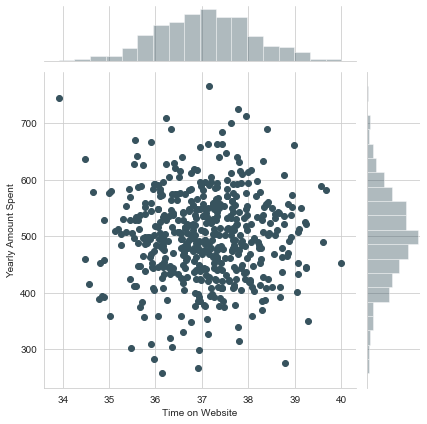

In [7]:
plt.figure(figsize=(6, 8))
splot = sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data = dados)

2) Faça o mesmo, mas comparando com o tempo gasto no aplicativo

<Figure size 432x576 with 0 Axes>

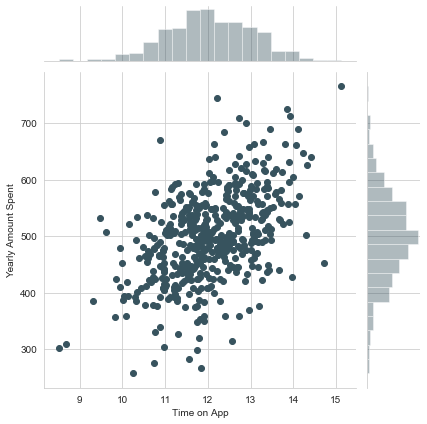

In [8]:
plt.figure(figsize=(6, 8))
splot = sns.jointplot(x='Time on App', y='Yearly Amount Spent', data = dados)

3) Faça um pairplot com os dados dos usuários.  Baseado neste plot o que parece ser a característica mais correlacionada com o valor anual gasto? 

A Caracteristica que apresenta maior correlação com a variável target de gasto anual, é a de quantidade de anos como cliente da plataforma

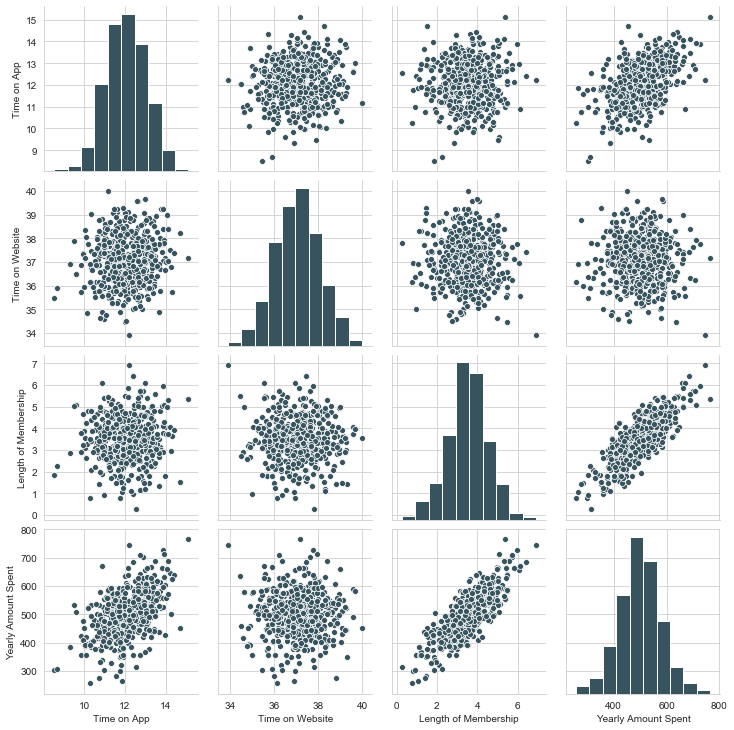

In [9]:
sns.pairplot(dados)

## Treinando e testando os dados

Agora que analisamos um pouco os nossos dados, vamos criar um modelo de Machine Learning usando **Regressão Linear**.

4) Crie uma variável y com o Valor gasto anualmente pelo usuário do Globoplay e crie uma variável X que contenha as demais características numéricas restantes dos clientes. Divida os dados em treinamento e teste, com tamanho do teste em 30%

In [10]:
X = dados.drop('Yearly Amount Spent', 1)  
y = pd.DataFrame(dados['Yearly Amount Spent'])

In [11]:
# Realiza a divisão da base para 70% de treinamento e 30% para testes
# Utilizarei a referencia da base como um todo com train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size = 0.7, random_state=42)

# Treinando o modelo

6) Agora vamos treinar nosso modelo! Importe a Regressão Linear da biblioteca sklearn, treine o modelo e print os coeficientes do mesmo.

In [12]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression().fit(X_train, y_train)

In [13]:
r2_train = clf.score(X_train, y_train)
print('R2 no set de treino: %.2f' % r2_train)

R2 no set de treino: 0.89


In [14]:
clf.coef_

array([[38.60854346,  0.78562369, 62.55928792]])

## Previsão de dados de teste


10) Faça uma previsão do conjunto X_test dos dados.

In [15]:
predicao = clf.predict(X_test)

11) Crie um diagrama de dispersão (scatterplot) dos valores reais de teste em relação aos valores preditos.

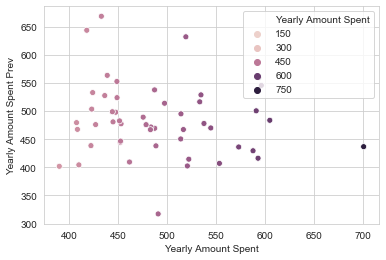

In [16]:
previsto = pd.DataFrame(data=predicao, columns = ["Yearly Amount Spent Prev"])
ax = sns.scatterplot(x=y_test["Yearly Amount Spent"], y=previsto["Yearly Amount Spent Prev"], hue= y_test["Yearly Amount Spent"])                     

## Avaliando o Modelo

Avalie o modelo usando métricas que você acha interessante.

In [17]:
#Primeiro vamos avaliar o P valor das variáveis do modelo para entender qual é a sua significancia(Váriveis com valores menores que 0,05 são importantes estátisticamente)
from sklearn import datasets, linear_model
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X_test)
est = sm.OLS(y_test, X2)
est2 = est.fit()
print(est2.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.865
Model:                             OLS   Adj. R-squared:                  0.862
Method:                  Least Squares   F-statistic:                     311.5
Date:                 Thu, 27 Aug 2020   Prob (F-statistic):           3.14e-63
Time:                         17:17:11   Log-Likelihood:                -707.75
No. Observations:                  150   AIC:                             1423.
Df Residuals:                      146   BIC:                             1436.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

c:\users\matheus.nobre\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [18]:
# O R2 é utilizado na análise da correlação das variáveis testadas 
print('R2 no set de treino: %.2f' % r2_train) ## o valor de 0.89 representa um alto valor das mesmas

R2 no set de treino: 0.89


## Conclusão
Devemos nos concentrar nos aplicativos móveis ou acesso web? O tempo como membro é importante? Como você interpreta os coeficientes gerados?

> Devemos nos concentrar no acesso a aplicativos móveis e sim o tempo como membro é importante o Pvalor dessas variáveis 
foram abaixo de 0,05, caracterizando que as mesmas tem importancia estatistica significativa para avaliar a
tomada de decisão do usuário quanto a compra, ter muito tempo como membro entretanto deve ser avaliado com cautela
uma vez que sua alta correlação coma compra, pode gera um overfiting no modelo, criando uma tendência prepoderante para 
recomendação.

Você acha que usar Regressão Linear nesse caso fez sentido? Qual outro modelo poderia ser utilizado e por quê?

Você acha que usar Regressão Linear nesse caso fez sentido? Qual outro modelo poderia ser utilizado e por quê

> Sim, este é um problema de sáida continua que busca gerar uma recomendação com base nos critérios de variabilidade de variaveis independentes, nesse caso uma regressão linear probabilística funciona adequadamente quando identificadas as variáveis que são importantes para o modelo, um outro modelo seria com redes neurais nesse caso o MLP.



```
Obrigado por ter chegado até aqui, iremos te dar um feedback o mais breve possível! 
```

